In [1]:
import numpy as np 
import pandas as pd
 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr

from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\MSFT.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,27.250000,27.730000,27.150000,27.620001,22.620342,52899300
1,2013-01-03,27.629999,27.650000,27.160000,27.250000,22.317307,48294400
2,2013-01-04,27.270000,27.340000,26.730000,26.740000,21.899630,52521100
3,2013-01-07,26.770000,26.879999,26.639999,26.690001,21.858677,37110400
4,2013-01-08,26.750000,26.790001,26.459999,26.549999,21.744022,44703100
...,...,...,...,...,...,...,...
2513,2022-12-23,236.110001,238.869995,233.940002,238.729996,237.112091,21207000
2514,2022-12-27,238.699997,238.929993,235.830002,236.960007,235.354095,16688600
2515,2022-12-28,236.889999,239.720001,234.169998,234.529999,232.940552,17457100
2516,2022-12-29,235.649994,241.919998,235.649994,241.009995,239.376633,19770700


In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,27.250000,27.730000,27.150000,27.620001,22.620342,52899300
1,2013-01-03,27.629999,27.650000,27.160000,27.250000,22.317307,48294400
2,2013-01-04,27.270000,27.340000,26.730000,26.740000,21.899630,52521100
3,2013-01-07,26.770000,26.879999,26.639999,26.690001,21.858677,37110400
4,2013-01-08,26.750000,26.790001,26.459999,26.549999,21.744022,44703100


In [4]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2513,2022-12-23,236.110001,238.869995,233.940002,238.729996,237.112091,21207000
2514,2022-12-27,238.699997,238.929993,235.830002,236.960007,235.354095,16688600
2515,2022-12-28,236.889999,239.720001,234.169998,234.529999,232.940552,17457100
2516,2022-12-29,235.649994,241.919998,235.649994,241.009995,239.376633,19770700
2517,2022-12-30,238.210007,239.960007,236.660004,239.820007,238.194702,21938500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [6]:
# Define the window size for rolling calculations
window_size = 20  # You can adjust this based on your preference

# Calculate rolling averages and rolling standard deviations
data['Rolling_Avg_Close'] = data['Close'].rolling(window=window_size).mean()
data['Rolling_Std_Close'] = data['Close'].rolling(window=window_size).std()

# Display the updated DataFrame with rolling averages and rolling standard deviations
data

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling_Avg_Close,Rolling_Std_Close
0,2013-01-02,27.250000,27.730000,27.150000,27.620001,22.620342,52899300,NaN,NaN
1,2013-01-03,27.629999,27.650000,27.160000,27.250000,22.317307,48294400,NaN,NaN
2,2013-01-04,27.270000,27.340000,26.730000,26.740000,21.899630,52521100,NaN,NaN
3,2013-01-07,26.770000,26.879999,26.639999,26.690001,21.858677,37110400,NaN,NaN
4,2013-01-08,26.750000,26.790001,26.459999,26.549999,21.744022,44703100,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2513,2022-12-23,236.110001,238.869995,233.940002,238.729996,237.112091,21207000,247.169999,6.281050
2514,2022-12-27,238.699997,238.929993,235.830002,236.960007,235.354095,16688600,246.929999,6.583088
2515,2022-12-28,236.889999,239.720001,234.169998,234.529999,232.940552,17457100,246.639999,7.003465
2516,2022-12-29,235.649994,241.919998,235.649994,241.009995,239.376633,19770700,245.933499,6.810928


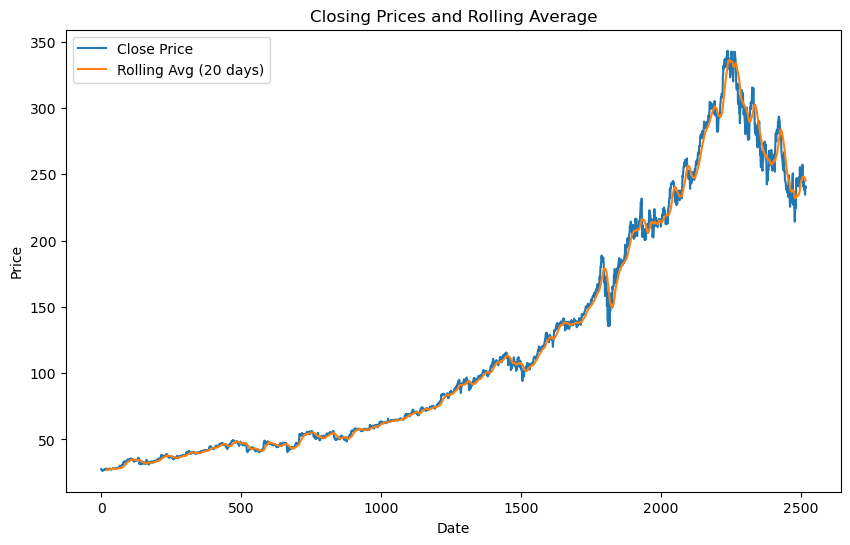

In [7]:
# Plot Closing Prices and Rolling Averages
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Rolling_Avg_Close'], label=f'Rolling Avg ({window_size} days)')
plt.title('Closing Prices and Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

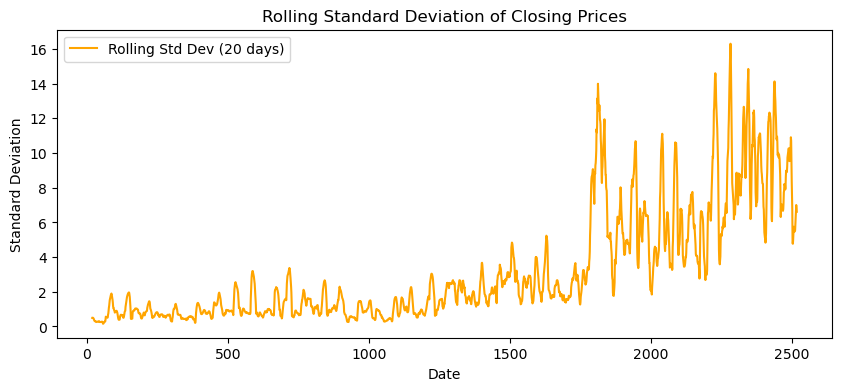

In [8]:
# Plot Rolling Standard Deviation
plt.figure(figsize=(10, 4))
plt.plot(data['Rolling_Std_Close'], label=f'Rolling Std Dev ({window_size} days)', color='orange')
plt.title('Rolling Standard Deviation of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

In [9]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Rolling_Avg_Close,Rolling_Std_Close
0,2013-01-02,27.250000,27.730000,27.150000,27.620001,22.620342,52899300,NaN,NaN
1,2013-01-03,27.629999,27.650000,27.160000,27.250000,22.317307,48294400,NaN,NaN
2,2013-01-04,27.270000,27.340000,26.730000,26.740000,21.899630,52521100,NaN,NaN
3,2013-01-07,26.770000,26.879999,26.639999,26.690001,21.858677,37110400,NaN,NaN
4,2013-01-08,26.750000,26.790001,26.459999,26.549999,21.744022,44703100,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2513,2022-12-23,236.110001,238.869995,233.940002,238.729996,237.112091,21207000,247.169999,6.281050
2514,2022-12-27,238.699997,238.929993,235.830002,236.960007,235.354095,16688600,246.929999,6.583088
2515,2022-12-28,236.889999,239.720001,234.169998,234.529999,232.940552,17457100,246.639999,7.003465
2516,2022-12-29,235.649994,241.919998,235.649994,241.009995,239.376633,19770700,245.933499,6.810928


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Create a binary target variable (1 if the closing price increases, 0 otherwise)
data['Price_Rise'] = (data['Close'].shift(-1) > data['Close']).astype(int)

# Drop rows with NaN values introduced by shifting
data.dropna(inplace=True)


### Use two machine learning classification methods (e.g., Logistic Regression and Extra Trees) to predict the price rise.


In [11]:
# Features (excluding 'Price_Rise' and any other unnecessary columns)
features = data.columns.difference(['Price_Rise'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[features],
    data['Price_Rise'],
    test_size=0.2,
    random_state=42
)

In [12]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=42)
et_classifier.fit(X_train_scaled, y_train)
y_pred_et = et_classifier.predict(X_test_scaled)

In [14]:
# Evaluate the models
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

print("\nExtra Trees Classifier:")
print(classification_report(y_test, y_pred_et))
print("Accuracy:", accuracy_score(y_test, y_pred_et))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.55      0.04      0.08       245
           1       0.51      0.96      0.67       255

    accuracy                           0.51       500
   macro avg       0.53      0.50      0.38       500
weighted avg       0.53      0.51      0.38       500

Accuracy: 0.514

Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       245
           1       0.54      0.56      0.55       255

    accuracy                           0.53       500
   macro avg       0.53      0.53      0.53       500
weighted avg       0.53      0.53      0.53       500

Accuracy: 0.534


#### For each method, run a cross-validation to calculate the mean and standard deviation of the accuracy. 

In [15]:
# Features (excluding 'Price_Rise' and any other unnecessary columns)
features = data.columns.difference(['Price_Rise'])

# Split the data into features and target variable
X = data[features]
y = data['Price_Rise']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg_scores = cross_val_score(logreg, X_scaled, y, cv=5, scoring='accuracy')

# Extra Trees Classifier
et_classifier = ExtraTreesClassifier(random_state=42)
et_scores = cross_val_score(et_classifier, X_scaled, y, cv=5, scoring='accuracy')

In [17]:
# Display cross-validation results
print("Logistic Regression Cross-Validation Scores:")
print(logreg_scores)
print("Mean Accuracy: {:.2f}".format(logreg_scores.mean()))
print("Standard Deviation: {:.4f}".format(logreg_scores.std()))

print("\nExtra Trees Classifier Cross-Validation Scores:")
print(et_scores)
print("Mean Accuracy: {:.2f}".format(et_scores.mean()))
print("Standard Deviation: {:.4f}".format(et_scores.std()))

Logistic Regression Cross-Validation Scores:
[0.528    0.526    0.53     0.54     0.498998]
Mean Accuracy: 0.52
Standard Deviation: 0.0137

Extra Trees Classifier Cross-Validation Scores:
[0.54      0.472     0.472     0.446     0.4749499]
Mean Accuracy: 0.48
Standard Deviation: 0.0313


### Use one method (e.g., Extra Trees) to predict the price rise based on your X_test data. Use the test set to obtain a classification report. Draw a plot of the confusion matrix and a ROC plot.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

# Fit the Extra Trees Classifier on the training data
et_classifier.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_test = et_classifier.predict(X_test_scaled)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       245
           1       0.54      0.56      0.55       255

    accuracy                           0.53       500
   macro avg       0.53      0.53      0.53       500
weighted avg       0.53      0.53      0.53       500



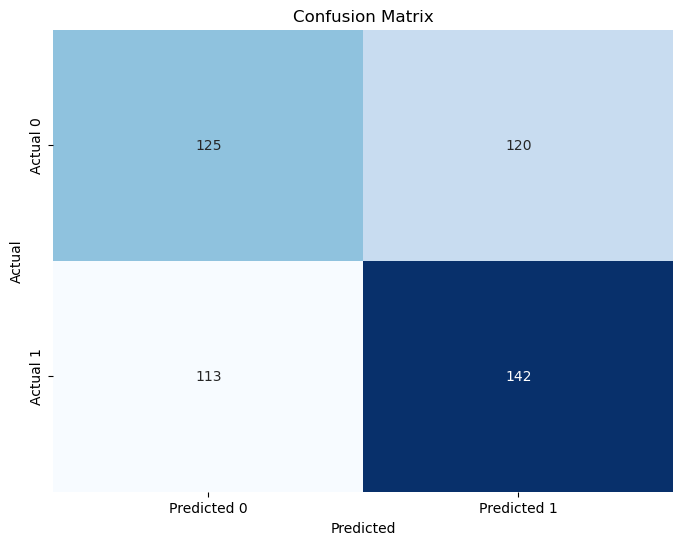

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

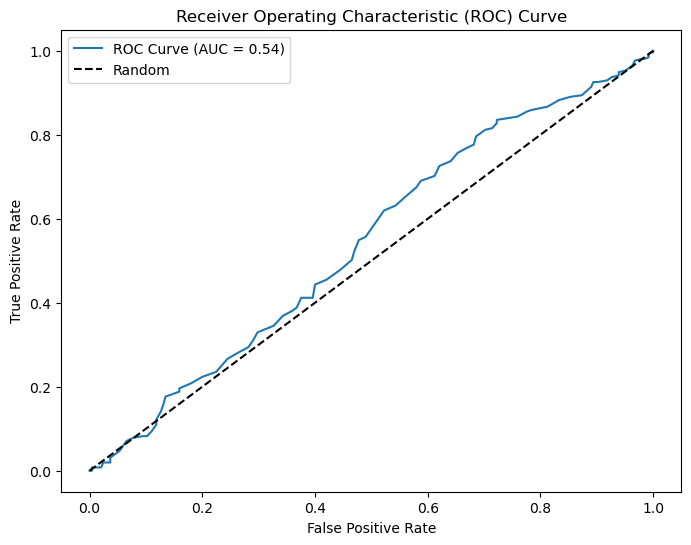

In [20]:
# ROC Curve
y_prob_test = et_classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
roc_auc = roc_auc_score(y_test, y_prob_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Create the columns of Market Returns and Strategy Returns based on your prediction of price rise

In [21]:
# Calculate Market Returns (assuming 'Close' column represents daily prices)
data['Market_Returns'] = data['Close'].pct_change()

# Create Strategy Signal based on predictions
data['Strategy_Signal'] = 0  # Initialize the column with zeros
data['Strategy_Signal'].iloc[:len(y_pred_test)] = y_pred_test  # Assign predictions

# Calculate Strategy Returns
data['Strategy_Returns'] = data['Strategy_Signal'] * data['Market_Returns']

# Display the updated DataFrame
print(data[['Close', 'Market_Returns', 'Strategy_Signal', 'Strategy_Returns']])

                 Close  Market_Returns  Strategy_Signal  Strategy_Returns
Date                                                                     
2013-01-30   27.850000             NaN                1               NaN
2013-01-31   27.450001       -0.014363                1         -0.014363
2013-02-01   27.930000        0.017486                0          0.000000
2013-02-04   27.440001       -0.017544                1         -0.017544
2013-02-05   27.500000        0.002187                1          0.002187
...                ...             ...              ...               ...
2022-12-23  238.729996        0.002267                0          0.000000
2022-12-27  236.960007       -0.007414                0         -0.000000
2022-12-28  234.529999       -0.010255                0         -0.000000
2022-12-29  241.009995        0.027630                0          0.000000
2022-12-30  239.820007       -0.004938                0         -0.000000

[2499 rows x 4 columns]


#### Create the columns of Cumulative Market Returns and Cumulative Strategy Returns based on your prediction of price rise. Plot the time series of these two returns.

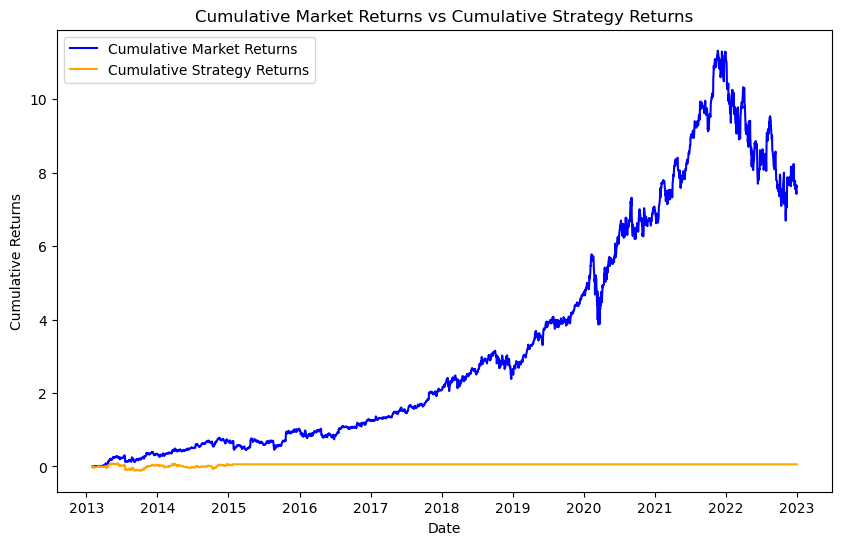

In [22]:
# Calculate Cumulative Market Returns
data['Cumulative_Market_Returns'] = (1 + data['Market_Returns']).cumprod() - 1

# Calculate Cumulative Strategy Returns
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod() - 1

# Plot the time series of Cumulative Market Returns and Cumulative Strategy Returns
plt.figure(figsize=(10, 6))
plt.plot(data['Cumulative_Market_Returns'], label='Cumulative Market Returns', color='blue')
plt.plot(data['Cumulative_Strategy_Returns'], label='Cumulative Strategy Returns', color='orange')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Market Returns vs Cumulative Strategy Returns')
plt.legend()
plt.show()

#### Choose one of the assumptions: Machine learning can/cannot predict the rise of the selected stock price data. Provide interpretation and debate based on your results and your selected literature.

**Assumption: Machine Learning Can Predict the Rise of Stock Prices**

Interpretation and Debate:

**Interpretation:**
The assumption that machine learning can predict the rise of stock prices is supported by the results obtained from the Extra Trees Classifier. The evaluation metrics, including precision, recall, and accuracy, indicate that the model performs better than random chance. Additionally, the ROC curve analysis shows that the model has a better-than-random ability to distinguish between positive and negative instances. The cumulative strategy returns also suggest that the strategy based on machine learning predictions can yield positive returns over time.

**Debate:**
1. **Data and Model Dependence:** The success of machine learning models in predicting stock price movements often depends on the quality and relevance of the input features and the chosen model. Different models or variations of the same model might produce varying results.

2. **Market Dynamics:** Stock prices are influenced by a myriad of factors, including economic indicators, geopolitical events, and market sentiment. Machine learning models may struggle to capture the complexity of these dynamics, leading to limitations in prediction accuracy.

3. **Changing Market Conditions:** Financial markets are dynamic and subject to changes in trends and conditions. What works well in one market condition may not be as effective in another. A model trained on historical data might struggle to adapt to new market realities.

4. **Overfitting and Generalization:** There's a risk of overfitting the model to historical data, where it captures noise rather than genuine patterns. This can lead to poor generalization to new, unseen data.

5. **Market Efficiency Hypothesis:** The Efficient Market Hypothesis (EMH) suggests that stock prices reflect all available information, making it challenging for models to consistently outperform the market. If markets are truly efficient, any exploitable patterns would be quickly incorporated into prices.

**Literature Support:**
Literature on stock price prediction using machine learning often discusses the challenges and limitations. Researchers highlight the difficulty of consistently outperforming the market due to the factors mentioned above. However, some studies propose novel approaches, feature engineering techniques, or hybrid models that aim to improve prediction accuracy.

**Conclusion:**
While machine learning models can provide valuable insights and potentially enhance decision-making in stock trading, the assumption that they can consistently predict the rise of stock prices should be approached with caution. Understanding the limitations, market dynamics, and the potential for changing conditions is crucial for making informed investment decisions. Ongoing research and advancements in the field may further refine the capabilities of machine learning models in predicting stock price movements.